In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [28]:
def do_prediction(X_train, Y_train, X_test, Y_test):
    clf = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.03, 
                    verbose=True)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    classif_report = classification_report(Y_test, Y_pred)
    return Y_pred, classif_report

def get_tsne(X):
    X_embedded = TSNE(n_components = 2, learning_rate='auto', init='random').fit_transform(X)
    return X_embedded


def get_plot(X, Y):
    data_embedded_combined = pd.DataFrame(data=np.c_[X, Y], columns=['tsne-one-d', 'tsne-two-d'] + ['target'])
    sns.lmplot(data=data_embedded_combined, x='tsne-one-d', y='tsne-two-d', hue='target', fit_reg = False)
    plt.show()

In [29]:
def get_anomaly_loss(original_data, restored_data):
    
    loss = np.sum((original_data - restored_data) ** 2, axis=1)
    return loss

In [30]:
data = pd.read_csv("../data/digits.csv")
data.drop(['Unnamed: 0'], inplace= True, axis= 1)
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [31]:
np.unique(data['target'], return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [32]:
# labels = {'ad.': 1,'nonad.': 0}
  
# data['class'] = [labels[item] for item in data['class']]
# data

In [33]:
x = data.drop(['target'], axis = 1)
y = data['target']
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Baseline

In [35]:
Y_pred_baseline, baseline_classification_report = do_prediction(X_train, Y_train, X_test, Y_test)

Iteration 1, loss = 2.35394094
Iteration 2, loss = 2.22873221
Iteration 3, loss = 2.14173916
Iteration 4, loss = 2.06343938
Iteration 5, loss = 1.97984047
Iteration 6, loss = 1.88956681
Iteration 7, loss = 1.80241276
Iteration 8, loss = 1.71803605
Iteration 9, loss = 1.63667256
Iteration 10, loss = 1.55825642
Iteration 11, loss = 1.48650718
Iteration 12, loss = 1.41272760
Iteration 13, loss = 1.34630016
Iteration 14, loss = 1.28364787
Iteration 15, loss = 1.22261510
Iteration 16, loss = 1.16796483
Iteration 17, loss = 1.11325222
Iteration 18, loss = 1.06359202
Iteration 19, loss = 1.01694701
Iteration 20, loss = 0.97919718
Iteration 21, loss = 0.94415936
Iteration 22, loss = 0.89910894
Iteration 23, loss = 0.86754921
Iteration 24, loss = 0.83515688
Iteration 25, loss = 0.81269557
Iteration 26, loss = 0.78506106
Iteration 27, loss = 0.75796719
Iteration 28, loss = 0.74480566
Iteration 29, loss = 0.71461143
Iteration 30, loss = 0.70176307
Iteration 31, loss = 0.67849848
Iteration 32, los

/home/parth20/anaconda3/envs/computer_vision/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
print(baseline_classification_report)
baseline_macro_precision, baseline_macro_recall, baseline_macro_f1, baseline_macro_support = precision_recall_fscore_support(Y_test, Y_pred_baseline, average='macro')
baseline_weighted_precision, baseline_weighted_recall, baseline_weighted_f1, baseline_weighted_support = precision_recall_fscore_support(Y_test, Y_pred_baseline, average='weighted')
baseline_accuracy = accuracy_score(Y_test, Y_pred_baseline)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92        43
         1.0       0.81      0.60      0.69        35
         2.0       0.80      0.92      0.86        36
         3.0       0.90      0.90      0.90        41
         4.0       0.88      0.97      0.93        38
         5.0       0.84      0.87      0.85        30
         6.0       1.00      0.92      0.96        37
         7.0       0.91      0.84      0.87        37
         8.0       0.73      0.83      0.77        29
         9.0       0.79      0.88      0.83        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



In [37]:
print("Baseline Results")
print(f"Accuracy = {baseline_accuracy}")
print(f"Precision --> macro = {baseline_macro_precision}, weighted = {baseline_weighted_precision}")
print(f"Recall    --> macro = {baseline_macro_recall}, weighted = {baseline_weighted_recall}")
print(f"F1-score  --> macro = {baseline_macro_f1}, weighted = {baseline_weighted_f1}")

Baseline Results
Accuracy = 0.8638888888888889
Precision --> macro = 0.8613182556600382, weighted = 0.8677795272105929
Recall    --> macro = 0.860987340331223, weighted = 0.8638888888888889
F1-score  --> macro = 0.8579740935906276, weighted = 0.8627338696955167


In [38]:
n_comps_list = range(1,64,10)
explained_var_ratio_list = []
for n_comps in n_comps_list:

    pca = PCA(n_components=n_comps)
    pca.fit_transform(X_train)
    # print(pca.explained_variance_ratio_.sum())
    explained_var_ratio_list.append(pca.explained_variance_ratio_.sum())


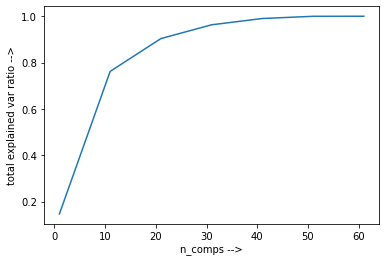

In [39]:
plt.plot(n_comps_list, explained_var_ratio_list)
plt.xlabel("n_comps -->")
plt.ylabel("total explained var ratio -->")
plt.show()

In [40]:
pca_final = PCA(n_components=40)
pca_X_train = pca_final.fit_transform(X_train)
X_train_restored = pca_final.inverse_transform(pca_X_train)

In [41]:
print(X_train_restored.shape)
print(X_train.shape)

(1437, 64)
(1437, 64)


In [42]:
loss_X_train = get_anomaly_loss(X_train, X_train_restored)
print(loss_X_train)

1328    26.907384
1562    40.889191
750      7.100312
1788     6.939552
408     25.469140
          ...    
905      9.629829
1791    22.065201
1096    10.215618
235     15.217197
1061     9.211736
Length: 1437, dtype: float64


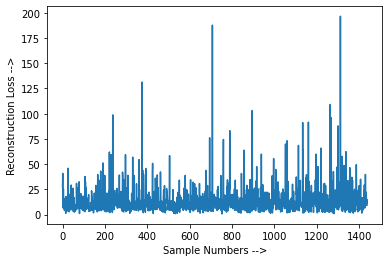

In [43]:
plt.plot(range(X_train.shape[0]), loss_X_train)
plt.xlabel("Sample Numbers -->")
plt.ylabel("Reconstruction Loss -->")
plt.show()

In [44]:
anomalies_index = np.where(loss_X_train >= 75)
anomalies_index

(array([ 237,  375,  694,  707,  789,  895, 1133, 1160, 1263, 1267, 1300,
        1311]),)

In [45]:
X_train_new = X_train.drop(X_train.index[anomalies_index])
Y_train_new = Y_train.drop(Y_train.index[anomalies_index])
print(X_train_new)
print(Y_train_new)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1328        0.0        0.0        0.0        2.0       15.0        8.0   
1562        0.0        0.0        0.0        7.0       16.0       16.0   
750         0.0        0.0        0.0        6.0       11.0        0.0   
1788        0.0        0.0        0.0        1.0       12.0        6.0   
408         0.0        0.0        9.0       11.0        2.0        0.0   
...         ...        ...        ...        ...        ...        ...   
905         0.0        0.0        2.0        8.0        7.0        0.0   
1791        0.0        0.0        0.0        3.0       15.0        4.0   
1096        0.0        0.0        7.0       12.0       11.0        1.0   
235         0.0        0.0        0.0        0.0       10.0       13.0   
1061        0.0        0.0        8.0       15.0       16.0       16.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
1328        0.0        0.0      

In [46]:
print(X_train.shape)
print(X_train_new.shape)

(1437, 64)
(1425, 64)


In [47]:
X_train_new.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1425.0,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,...,1425.000000,1425.000000,1425.0,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,0.0,0.295439,5.239298,11.872982,11.848421,5.764211,1.361404,0.082807,0.003509,1.976842,...,3.755789,0.193684,0.0,0.268772,5.565614,12.136842,11.741754,6.716491,2.059649,0.344561
std,0.0,0.877553,4.746332,4.223896,4.259594,5.683900,3.286942,0.678848,0.070024,3.145605,...,4.952798,0.905873,0.0,0.868479,5.094343,4.324798,4.957046,5.904285,4.069958,1.791408
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,11.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,4.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.0,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,10.000000,2.000000,14.000000,...,16.000000,10.000000,0.0,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


New Model

In [48]:
Y_pred_model, model_classification_report = do_prediction(X_train_new, Y_train_new, X_test, Y_test)

Iteration 1, loss = 2.35433905
Iteration 2, loss = 2.22841301
Iteration 3, loss = 2.14372260
Iteration 4, loss = 2.07702585
Iteration 5, loss = 1.99859509
Iteration 6, loss = 1.90882569
Iteration 7, loss = 1.82225826
Iteration 8, loss = 1.72706144
Iteration 9, loss = 1.64095845
Iteration 10, loss = 1.56242091
Iteration 11, loss = 1.48321298
Iteration 12, loss = 1.41382900
Iteration 13, loss = 1.34547839
Iteration 14, loss = 1.28588940
Iteration 15, loss = 1.22620131
Iteration 16, loss = 1.17510560
Iteration 17, loss = 1.12585547
Iteration 18, loss = 1.08696706
Iteration 19, loss = 1.04184727
Iteration 20, loss = 1.00266461
Iteration 21, loss = 0.96761347
Iteration 22, loss = 0.93935559
Iteration 23, loss = 0.90299512
Iteration 24, loss = 0.87215068
Iteration 25, loss = 0.84540865
Iteration 26, loss = 0.81029547
Iteration 27, loss = 0.78856379
Iteration 28, loss = 0.77046833
Iteration 29, loss = 0.74304686
Iteration 30, loss = 0.72521610
Iteration 31, loss = 0.70017181
Iteration 32, los

In [50]:
print(model_classification_report)
model_macro_precision, model_macro_recall, model_macro_f1, model_macro_support = precision_recall_fscore_support(Y_test, Y_pred_model, average='macro')
model_weighted_precision, model_weighted_recall, model_weighted_f1, model_weighted_support = precision_recall_fscore_support(Y_test, Y_pred_model, average='weighted')
model_accuracy = accuracy_score(Y_test, Y_pred_model)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92        43
         1.0       0.90      0.77      0.83        35
         2.0       0.86      1.00      0.92        36
         3.0       1.00      0.80      0.89        41
         4.0       0.93      0.97      0.95        38
         5.0       0.79      0.90      0.84        30
         6.0       0.94      0.92      0.93        37
         7.0       0.97      0.89      0.93        37
         8.0       0.96      0.76      0.85        29
         9.0       0.69      0.97      0.80        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



In [51]:
print("New Model Results")
print(f"Accuracy = {model_accuracy}")
print(f"Precision --> macro = {model_macro_precision}, weighted = {model_weighted_precision}")
print(f"Recall    --> macro = {model_macro_recall}, weighted = {model_weighted_recall}")
print(f"F1-score  --> macro = {model_macro_f1}, weighted = {model_weighted_f1}")

New Model Results
Accuracy = 0.8888888888888888
Precision --> macro = 0.8985314923070679, weighted = 0.9031972551500472
Recall    --> macro = 0.8873731496728035, weighted = 0.8888888888888888
F1-score  --> macro = 0.8865984854096538, weighted = 0.8899360297813455


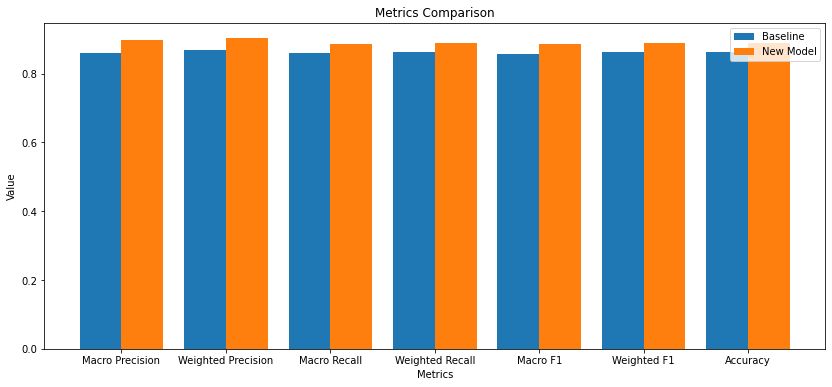

In [59]:
metrics = ['Macro Precision', 'Weighted Precision', 'Macro Recall', 'Weighted Recall', 'Macro F1', 'Weighted F1', 'Accuracy']
metrics_baseline = [baseline_macro_precision, baseline_weighted_precision, baseline_macro_recall, baseline_weighted_recall, baseline_macro_f1, baseline_weighted_f1, baseline_accuracy]
metrics_model = [model_macro_precision, model_weighted_precision, model_macro_recall, model_weighted_recall, model_macro_f1, model_weighted_f1, model_accuracy]

X_axis = np.arange(len(metrics))

plt.figure(figsize=(14, 6))
plt.bar(X_axis - 0.2, metrics_baseline, 0.4, label = 'Baseline')
plt.bar(X_axis + 0.2, metrics_model, 0.4, label = 'New Model')

plt.xticks(X_axis, metrics)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Metrics Comparison')
plt.legend()
plt.show()